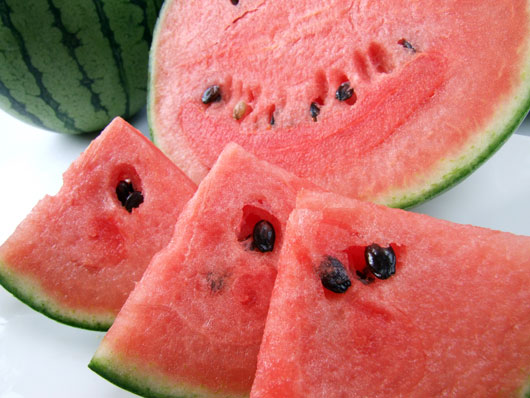

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# 指定单张图像路径
img_path = 'E:/dataSetCollect/mmseg/Watermelon87_Semantic_Seg_Mask/img_dir/train/skmrk03.jpg'
mask_path = 'E:/dataSetCollect/mmseg/Watermelon87_Semantic_Seg_Mask/ann_dir/train/skmrk03.png'
Image.open(img_path)

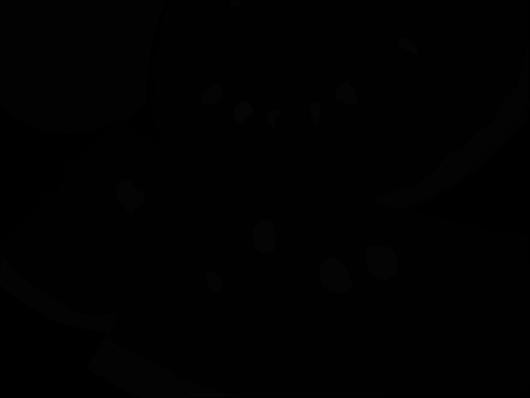

In [2]:
Image.open(mask_path)

In [3]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)
print(img.shape,mask.shape)

(398, 530, 3) (398, 530, 3)


## mask灰度标注及含义

[0 1 2 3 4 5]


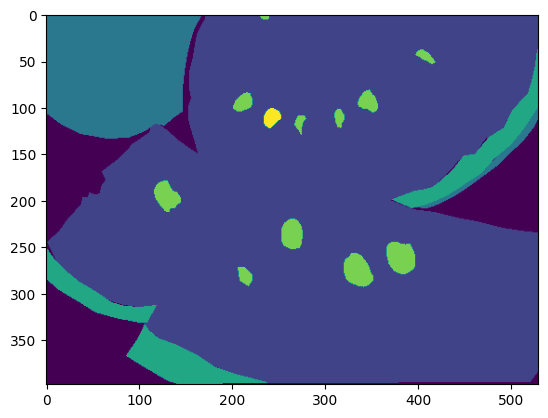

In [4]:
print(np.unique(mask))
# 绘制标注
plt.imshow(mask[:,:,0])
plt.show()

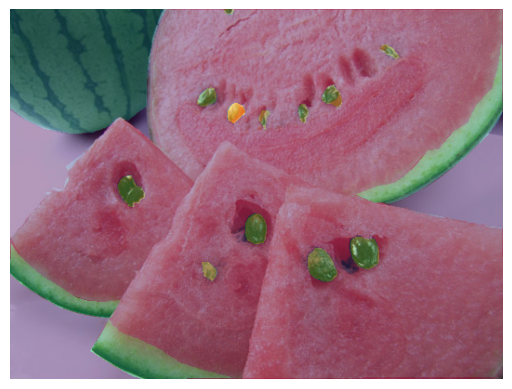

In [5]:
plt.imshow(img[:,:,::-1])
plt.imshow(mask[:,:,0], alpha=0.4) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

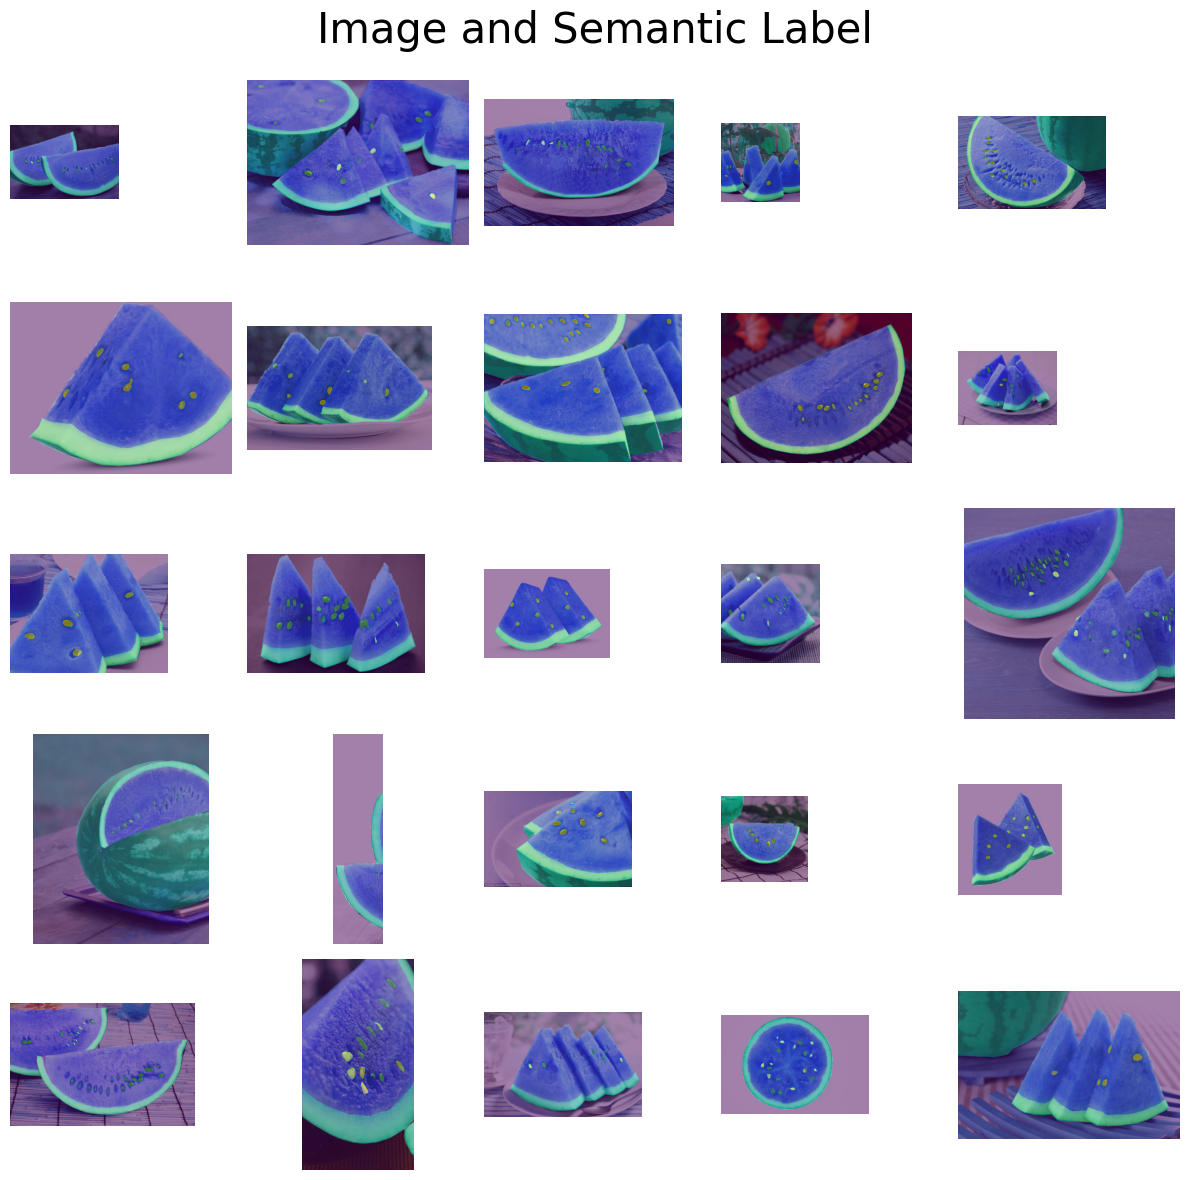

In [6]:
# 指定图像和标注路径
PATH_IMAGE = 'E:/dataSetCollect/mmseg/Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'E:/dataSetCollect/mmseg/Watermelon87_Semantic_Seg_Mask/ann_dir/train'

# n行n列可视化
n = 5
# 标注区域透明度
opacity = 0.5
fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))
for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

## 可视化训练日志

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 日志文件路径
log_path = './watermelon/20230615_211716/vis_data/scalars.json'
with open(log_path, "r") as f:
    json_list = f.readlines()
print(len(json_list))

111


In [8]:
eval(json_list[4])

{'lr': 9.993305959168946e-06,
 'data_time': 0.004286003112792969,
 'grad_norm': 459.02669219970704,
 'loss': 45.0256706237793,
 'decode.loss_cls': 0.9372098177671433,
 'decode.loss_mask': 1.2783322870731353,
 'decode.loss_dice': 1.735546386241913,
 'decode.d0.loss_cls': 9.75043077468872,
 'decode.d0.loss_mask': 1.0757014334201813,
 'decode.d0.loss_dice': 1.7007070660591126,
 'decode.d1.loss_cls': 0.8398957580327988,
 'decode.d1.loss_mask': 1.2034435272216797,
 'decode.d1.loss_dice': 1.6086626768112182,
 'decode.d2.loss_cls': 0.569495165348053,
 'decode.d2.loss_mask': 1.2184868097305297,
 'decode.d2.loss_dice': 1.5985990524291993,
 'decode.d3.loss_cls': 0.5217506647109985,
 'decode.d3.loss_mask': 1.1795492887496948,
 'decode.d3.loss_dice': 1.6456295609474183,
 'decode.d4.loss_cls': 0.5168530523777009,
 'decode.d4.loss_mask': 1.2812006175518036,
 'decode.d4.loss_dice': 1.6936385989189149,
 'decode.d5.loss_cls': 0.5773348897695542,
 'decode.d5.loss_mask': 1.2202307760715485,
 'decode.d5.l

In [10]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

In [11]:
df_train

,lr,data_time,grad_norm,loss,decode.loss_cls,decode.loss_mask,decode.loss_dice,decode.d0.loss_cls,decode.d0.loss_mask,decode.d0.loss_dice,...,decode.d6.loss_dice,decode.d7.loss_cls,decode.d7.loss_mask,decode.d7.loss_dice,decode.d8.loss_cls,decode.d8.loss_mask,decode.d8.loss_dice,time,memory,step
0,0.00001,0.004286,228.176542,106.022474,3.593365,2.702619,4.144895,10.187278,1.821167,3.601695,...,4.100659,3.611388,2.657054,4.108524,3.613569,2.750143,4.143266,0.465993,9583.0,23.0
1,0.00001,0.004649,161.840680,99.909124,3.224831,2.716108,4.038447,10.198317,1.803924,3.433631,...,3.918298,3.247963,2.650491,3.976578,3.264490,2.732794,4.025493,0.462023,8318.0,30.0
2,0.00001,0.004186,303.526294,73.985868,2.805188,1.952832,3.152706,10.040083,1.400543,2.729170,...,2.694594,2.581627,1.704744,2.850614,2.763868,1.749000,2.882986,0.464535,8329.0,60.0
3,0.00001,0.004286,353.478964,56.186330,1.710455,1.382945,2.148205,9.894067,1.249545,2.189045,...,2.164532,1.338299,1.433335,2.169959,1.473437,1.432723,2.090531,0.460695,8329.0,90.0
4,0.00001,0.004286,459.026692,45.025671,0.937210,1.278332,1.735546,9.750431,1.075701,1.700707,...,1.743387,0.633641,1.291748,1.774931,0.776306,1.285245,1.782909,0.454929,8329.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.00001,0.004045,99.133018,8.213101,0.010020,0.301077,0.495089,0.084744,0.301846,0.500322,...,0.483513,0.011588,0.302295,0.502261,0.011400,0.299313,0.500570,0.454162,8331.0,2880.0
97,0.00001,0.004186,153.083500,9.167451,0.102317,0.312978,0.497534,0.089809,0.310172,0.510199,...,0.503634,0.113108,0.312502,0.480438,0.099772,0.312930,0.475348,0.455048,8331.0,2910.0
98,0.00001,0.003987,210.465615,9.648193,0.012794,0.387279,0.578643,0.078342,0.388509,0.542627,...,0.564630,0.013986,0.387605,0.571879,0.035297,0.389475,0.539782,0.453696,8331.0,2940.0
99,0.00001,0.003987,106.092072,9.450678,0.116618,0.299471,0.533949,0.097126,0.298989,0.547380,...,0.553261,0.125862,0.293550,0.554732,0.117552,0.297102,0.537085,0.453041,8331.0,2970.0


In [12]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,96.51,72.01,79.70,0.243992,0.523254,300.0
1,96.91,75.31,80.77,0.007475,0.120513,600.0
2,97.69,81.09,88.16,0.004236,0.111646,900.0
3,97.82,80.79,85.91,0.003987,0.105960,1200.0
4,97.90,82.52,86.41,0.004155,0.111245,1500.0
5,97.96,83.69,89.75,0.003654,0.111192,1800.0
6,97.84,84.62,91.66,0.003904,0.112791,2100.0
7,97.90,84.48,91.06,0.003821,0.112026,2400.0
8,98.08,84.36,88.63,0.003571,0.107074,2700.0


## 可视化辅助函数

In [13]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

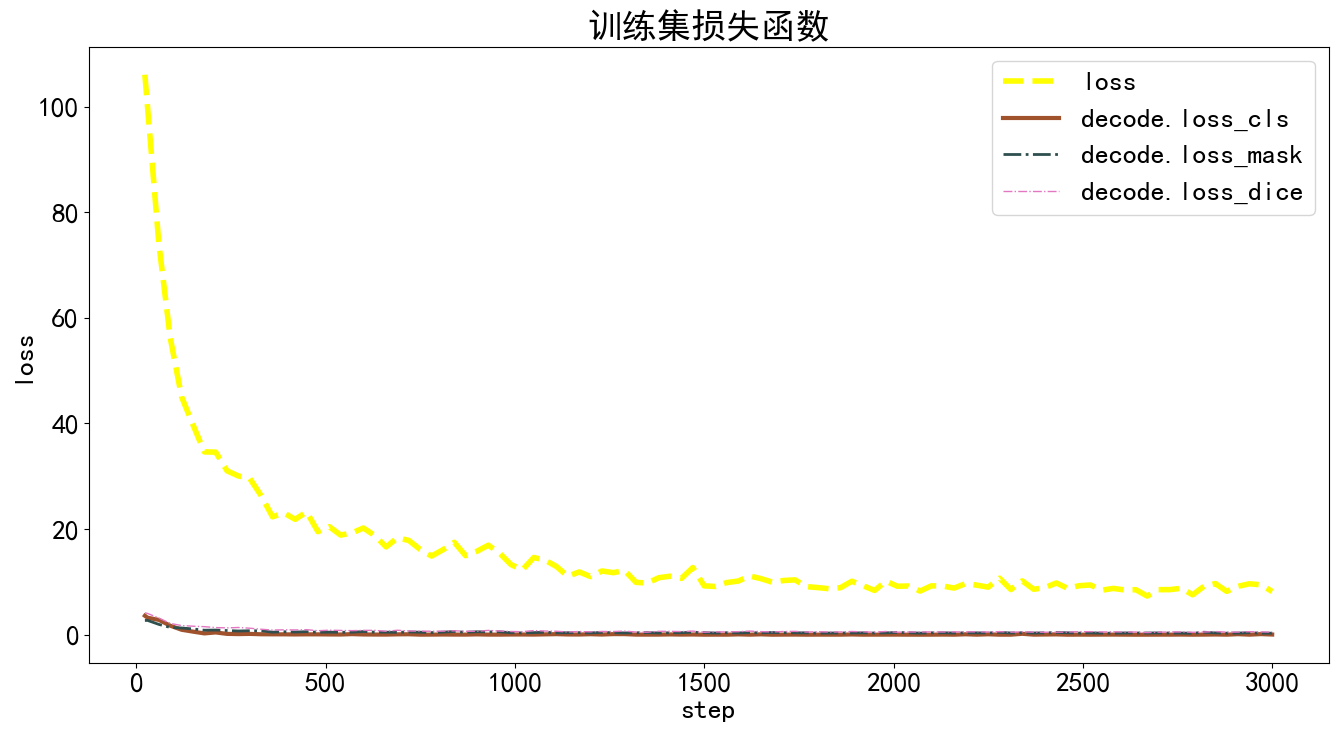

In [18]:
metrics = ['loss', 'decode.loss_cls', 'decode.loss_mask',"decode.loss_dice"]
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
plt.figure(figsize=(16, 8))
x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [19]:
df_train.columns

Index(['lr', 'data_time', 'grad_norm', 'loss', 'decode.loss_cls',
       'decode.loss_mask', 'decode.loss_dice', 'decode.d0.loss_cls',
       'decode.d0.loss_mask', 'decode.d0.loss_dice', 'decode.d1.loss_cls',
       'decode.d1.loss_mask', 'decode.d1.loss_dice', 'decode.d2.loss_cls',
       'decode.d2.loss_mask', 'decode.d2.loss_dice', 'decode.d3.loss_cls',
       'decode.d3.loss_mask', 'decode.d3.loss_dice', 'decode.d4.loss_cls',
       'decode.d4.loss_mask', 'decode.d4.loss_dice', 'decode.d5.loss_cls',
       'decode.d5.loss_mask', 'decode.d5.loss_dice', 'decode.d6.loss_cls',
       'decode.d6.loss_mask', 'decode.d6.loss_dice', 'decode.d7.loss_cls',
       'decode.d7.loss_mask', 'decode.d7.loss_dice', 'decode.d8.loss_cls',
       'decode.d8.loss_mask', 'decode.d8.loss_dice', 'time', 'memory', 'step'],
      dtype='object')

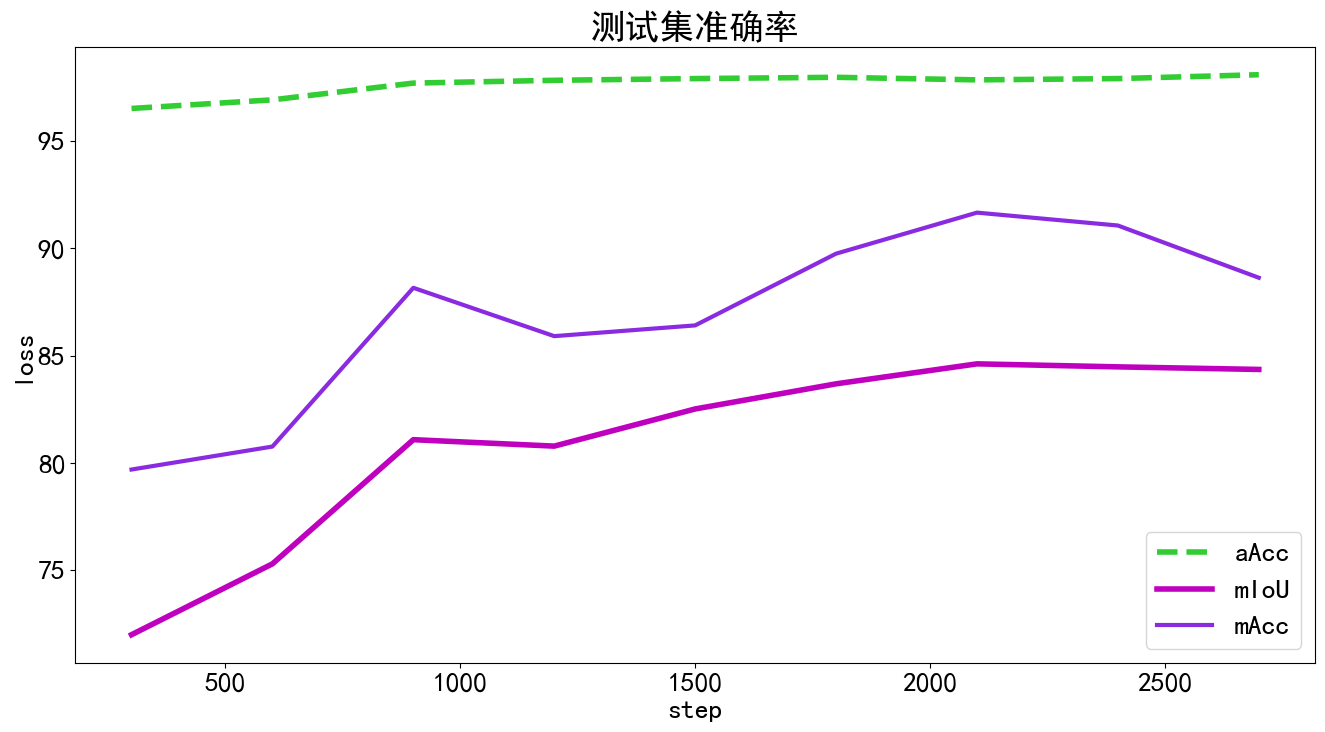

In [22]:
metrics = ['aAcc', 'mIoU','mAcc']
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('测试集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.show()

## 混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())
confusion_matrix_model